## Feature Engineering and Remodeling  

#### To Do:

1. Perform the required Feature Engineering (Feature Selection using RFE, Feature Transformation, etc.)

2. Rebuild the models (Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc.

3. Compare the model (With Feature Engineering) Performance with previous model (Without Feature Engineering) 

In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('Clean.csv')

In [3]:
df1.shape

(10000, 25)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   Accomodation_Type        10000 non-null  int64  
 2   Reco_Insurance_Type      10000 non-null  int64  
 3   Is_Spouse                10000 non-null  int64  
 4   Holding_Policy_Duration  10000 non-null  int64  
 5   Reco_Policy_Premium      10000 non-null  float64
 6   Response                 10000 non-null  int64  
 7   X1                       10000 non-null  float64
 8   X2                       10000 non-null  float64
 9   X3                       10000 non-null  float64
 10  X4                       10000 non-null  float64
 11  X5                       10000 non-null  float64
 12  X6                       10000 non-null  float64
 13  X7                       10000 non-null  float64
 14  X8                     

In [5]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df1['Response'].value_counts()

0    7541
1    2459
Name: Response, dtype: int64

In [7]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()

In [8]:
X=df1.drop('Response',axis=1)
y=df1['Response']

In [9]:
predicts,response=sampler.fit_resample(X,y)

In [10]:
print(predicts.shape,response.shape)

(15082, 23) (15082,)


In [11]:
response.value_counts()

1    7541
0    7541
Name: Response, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [17]:
predicts.head()

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Premium,X1,X2,X3,X4,X5,...,Age,City_Code_C10-C18,City_Code_C19-C27,City_Code_C28-C36,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Reco_Policy_Cat_12-15,Reco_Policy_Cat_16-22,Reco_Policy_Cat_6-11
0,1,1,0,15,13320.0,1.0,0.0,0.0,0.0,0.0,...,36.0,0,0,0,1,0,0,0,1,0
1,1,1,0,10,16152.0,0.0,0.0,0.0,0.0,0.0,...,66.0,0,0,0,0,0,0,0,1,0
2,0,1,0,3,7310.0,1.0,0.0,0.0,0.0,0.0,...,24.0,0,0,0,0,0,0,0,1,0
3,0,1,0,1,15792.0,1.0,0.0,0.0,0.0,0.0,...,75.0,0,1,0,0,1,0,0,1,0
4,1,0,1,15,23673.0,1.0,0.0,0.0,0.0,0.0,...,58.5,0,0,0,0,0,1,0,1,0


In [18]:
predicts.shape

(15082, 23)

In [19]:
predicts['Age']=scaler.fit_transform(predicts[['Age']])
predicts['Holding_Policy_Duration']=scaler.fit_transform(predicts[['Holding_Policy_Duration']])
predicts['Reco_Policy_Premium']=scaler.fit_transform(predicts[['Reco_Policy_Premium']])

In [20]:
predicts

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Premium,X1,X2,X3,X4,X5,...,Age,City_Code_C10-C18,City_Code_C19-C27,City_Code_C28-C36,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Reco_Policy_Cat_12-15,Reco_Policy_Cat_16-22,Reco_Policy_Cat_6-11
0,1,1,0,0.971262,-0.129807,1.000000,0.000000,0.000000,0.000000,0.0,...,-0.466424,0,0,0,1,0,0,0,1,0
1,1,1,0,0.042880,0.315590,0.000000,0.000000,0.000000,0.000000,0.0,...,1.331724,0,0,0,0,0,0,0,1,0
2,0,1,0,-1.256856,-1.075017,1.000000,0.000000,0.000000,0.000000,0.0,...,-1.185684,0,0,0,0,0,0,0,1,0
3,0,1,0,-1.628209,0.258972,1.000000,0.000000,0.000000,0.000000,0.0,...,1.871168,0,1,0,0,1,0,0,1,0
4,1,0,1,0.971262,1.498439,1.000000,0.000000,0.000000,0.000000,0.0,...,0.882187,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15077,0,0,0,0.785586,1.049194,0.000000,0.738049,0.261951,0.000000,0.0,...,0.300742,0,0,0,0,1,0,0,0,0
15078,0,1,0,0.228556,-0.399693,0.000000,0.000000,0.000000,1.000000,0.0,...,-0.984951,0,0,0,0,0,0,0,1,0
15079,0,1,0,-1.071179,-0.494994,0.210776,0.000000,0.000000,0.789224,0.0,...,-0.100620,0,0,0,0,0,0,0,0,0
15080,1,0,1,0.971262,2.190909,0.000000,0.541767,0.000000,0.458233,0.0,...,1.445305,0,0,0,0,0,0,0,1,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(predicts,response,test_size=0.2)

## Model Building - Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Train the Model using `Accuracy` as the evaluation metric
2. Predict
3. Evaluate use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
4. Compare the perormance of all the models

In [23]:
Performance_with_over_sampled_data=pd.DataFrame(index=['Accuracy','Precision','Recall','F1_score','AUC'])

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(max_iter=10000)

In [25]:
LR_model.fit(x_train,y_train)
print('Training Accuracy : ',LR_model.score(x_train,y_train))

Training Accuracy :  0.6943224202237878


In [26]:
lg_pred=LR_model.predict(x_test)
print('Testing Accuracy : ',LR_model.score(x_test,y_test))

Testing Accuracy :  0.6983758700696056


In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score

In [28]:
confusion_matrix(y_test,lg_pred)

array([[1124,  388],
       [ 522,  983]], dtype=int64)

In [29]:
print(classification_report(y_test,lg_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,lg_pred))
print('Precission : ',precision_score(y_test,lg_pred))
print('Recall : ',recall_score(y_test,lg_pred))
print('f1-score : ',f1_score(y_test,lg_pred))
print('Roc Auc score : ',roc_auc_score(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1512
           1       0.72      0.65      0.68      1505

    accuracy                           0.70      3017
   macro avg       0.70      0.70      0.70      3017
weighted avg       0.70      0.70      0.70      3017


Accuracy is :  0.6983758700696056
Precission :  0.7169948942377826
Recall :  0.653156146179402
f1-score :  0.6835883171070931
Roc Auc score :  0.6982711947828226


In [30]:
y_preds = LR_model.predict_proba(x_test)[:,1]

In [31]:
from sklearn.metrics import roc_curve,auc
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.759151593453919


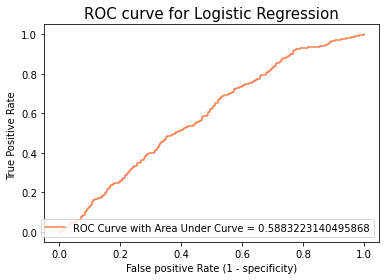

In [32]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Logistic Regression',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [32]:
Performance_with_over_sampled_data['Logistic Regression']=[accuracy_score(y_test,lg_pred),
                                                                    precision_score(y_test,lg_pred),
                                                                    recall_score(y_test,lg_pred),
                                                                    f1_score(y_test,lg_pred),
                                                                    auc(fpr, tpr)]

# SVM

In [33]:
from sklearn.svm import SVC
svm_model=SVC(probability=True)

In [34]:
svm_model.fit(x_train,y_train)
print('Training Accuracy : ',svm_model.score(x_train,y_train))

Training Accuracy :  0.7638624119353502


In [35]:
sv_pred=svm_model.predict(x_test)
print('Testing Accuracy : ',svm_model.score(x_test,y_test))

Testing Accuracy :  0.7431223069274113


In [36]:
confusion_matrix(y_test,sv_pred)

array([[1324,  188],
       [ 587,  918]], dtype=int64)

In [37]:
print(classification_report(y_test,sv_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,sv_pred))
print('Precission : ',precision_score(y_test,sv_pred))
print('Recall : ',recall_score(y_test,sv_pred))
print('f1-score : ',f1_score(y_test,sv_pred))
print('Roc Auc score : ',roc_auc_score(y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77      1512
           1       0.83      0.61      0.70      1505

    accuracy                           0.74      3017
   macro avg       0.76      0.74      0.74      3017
weighted avg       0.76      0.74      0.74      3017


Accuracy is :  0.7431223069274113
Precission :  0.8300180831826401
Recall :  0.6099667774086379
f1-score :  0.7031788586748372
Roc Auc score :  0.7428140765350068


In [38]:
y_preds = svm_model.predict_proba(x_test)[:,1]

In [39]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.8067653676457665


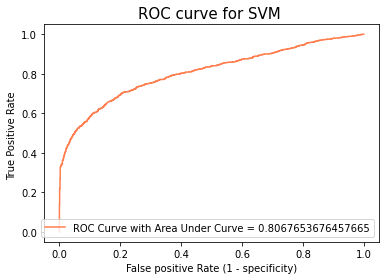

In [40]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for SVM ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [42]:
Performance_with_over_sampled_data['SVM']=[accuracy_score(y_test,sv_pred),
                                                                    precision_score(y_test,sv_pred),
                                                                    recall_score(y_test,sv_pred),
                                                                    f1_score(y_test,sv_pred),
                                                                    auc(fpr, tpr)]

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [44]:
dt_model.fit(x_train,y_train)
print('Training Accuracy : ',dt_model.score(x_train,y_train))

Training Accuracy :  0.9998342312474099


In [45]:
dt_pred=dt_model.predict(x_test)
print('Testing Accuracy : ',dt_model.score(x_test,y_test))

Testing Accuracy :  0.7381504806098773


In [46]:
confusion_matrix(y_test,dt_pred)

array([[1124,  388],
       [ 402, 1103]], dtype=int64)

In [47]:
print(classification_report(y_test,dt_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,dt_pred))
print('Precission : ',precision_score(y_test,dt_pred))
print('Recall : ',recall_score(y_test,dt_pred))
print('f1-score : ',f1_score(y_test,dt_pred))
print('Roc Auc score : ',roc_auc_score(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1512
           1       0.74      0.73      0.74      1505

    accuracy                           0.74      3017
   macro avg       0.74      0.74      0.74      3017
weighted avg       0.74      0.74      0.74      3017


Accuracy is :  0.7381504806098773
Precission :  0.7397719651240778
Recall :  0.7328903654485049
f1-score :  0.7363150867823764
Roc Auc score :  0.7381383044173742


In [48]:
y_preds = dt_model.predict_proba(x_test)[:,1]

In [49]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.7379616446061629


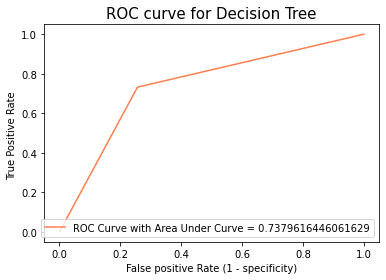

In [50]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Decision Tree',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [52]:
Performance_with_over_sampled_data['Decision Tree']=[accuracy_score(y_test,dt_pred),
                                                                    precision_score(y_test,dt_pred),
                                                                    recall_score(y_test,dt_pred),
                                                                    f1_score(y_test,dt_pred),
                                                                    auc(fpr, tpr)]

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [54]:
rf_model.fit(x_train,y_train)
print('Training Accuracy : ',rf_model.score(x_train,y_train))

Training Accuracy :  0.9998342312474099


In [55]:
rf_pred=rf_model.predict(x_test)
print('Testing Accuracy : ',rf_model.score(x_test,y_test))

Testing Accuracy :  0.760689426582698


In [56]:
confusion_matrix(y_test,rf_pred)

array([[1263,  249],
       [ 473, 1032]], dtype=int64)

In [57]:
print(classification_report(y_test,rf_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,rf_pred))
print('Precission : ',precision_score(y_test,rf_pred))
print('Recall : ',recall_score(y_test,rf_pred))
print('f1-score : ',f1_score(y_test,rf_pred))
print('Roc Auc score : ',roc_auc_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1512
           1       0.81      0.69      0.74      1505

    accuracy                           0.76      3017
   macro avg       0.77      0.76      0.76      3017
weighted avg       0.77      0.76      0.76      3017


Accuracy is :  0.760689426582698
Precission :  0.8056206088992974
Recall :  0.6857142857142857
f1-score :  0.7408470926058865
Roc Auc score :  0.760515873015873


In [58]:
y_preds = rf_model.predict_proba(x_test)[:,1]

In [59]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.8265578582854332


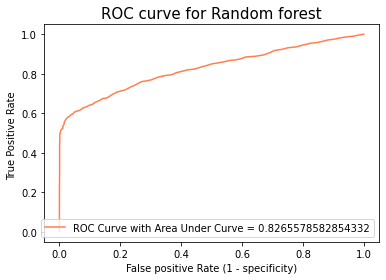

In [60]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Random forest',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [62]:
Performance_with_over_sampled_data['Random Forest']=[accuracy_score(y_test,rf_pred),
                                                                    precision_score(y_test,rf_pred),
                                                                    recall_score(y_test,rf_pred),
                                                                    f1_score(y_test,rf_pred),
                                                                    auc(fpr, tpr)]

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

In [64]:
knn_model.fit(x_train,y_train)
print('Training Accuracy : ',knn_model.score(x_train,y_train))

Training Accuracy :  0.8064649813510153


In [65]:
kn_pred=knn_model.predict(x_test)
print('Testing Accuracy : ',knn_model.score(x_test,y_test))

Testing Accuracy :  0.69804441498177


In [66]:
confusion_matrix(y_test,kn_pred)

array([[1081,  431],
       [ 480, 1025]], dtype=int64)

In [67]:
print(classification_report(y_test,kn_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,kn_pred))
print('Precission : ',precision_score(y_test,kn_pred))
print('Recall : ',recall_score(y_test,kn_pred))
print('f1-score : ',f1_score(y_test,kn_pred))
print('Roc Auc score : ',roc_auc_score(y_test,kn_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1512
           1       0.70      0.68      0.69      1505

    accuracy                           0.70      3017
   macro avg       0.70      0.70      0.70      3017
weighted avg       0.70      0.70      0.70      3017


Accuracy is :  0.69804441498177
Precission :  0.7039835164835165
Recall :  0.6810631229235881
f1-score :  0.6923336710570753
Roc Auc score :  0.6980051064353391


In [68]:
y_preds = knn_model.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.7659242120620858


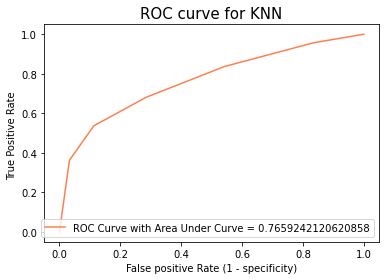

In [69]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for KNN',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [70]:
Performance_with_over_sampled_data['KNN']=[accuracy_score(y_test,kn_pred),
                                                                    precision_score(y_test,kn_pred),
                                                                    recall_score(y_test,kn_pred),
                                                                    f1_score(y_test,kn_pred),
                                                                    auc(fpr, tpr)]

# Adaboosting

In [71]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()

In [72]:
adaboost.fit(x_train,y_train)
print('Training Accuracy : ',adaboost.score(x_train,y_train))

Training Accuracy :  0.764774140074596


In [73]:
ad_pred=adaboost.predict(x_test)
print('Testing Accuracy : ',adaboost.score(x_test,y_test))

Testing Accuracy :  0.749088498508452


In [74]:
confusion_matrix(y_test,ad_pred)

array([[1337,  175],
       [ 582,  923]], dtype=int64)

In [75]:
print(classification_report(y_test,ad_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,ad_pred))
print('Precission : ',precision_score(y_test,ad_pred))
print('Recall : ',recall_score(y_test,ad_pred))
print('f1-score : ',f1_score(y_test,ad_pred))
print('Roc Auc score : ',roc_auc_score(y_test,ad_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      1512
           1       0.84      0.61      0.71      1505

    accuracy                           0.75      3017
   macro avg       0.77      0.75      0.74      3017
weighted avg       0.77      0.75      0.74      3017


Accuracy is :  0.749088498508452
Precission :  0.8406193078324226
Recall :  0.6132890365448505
f1-score :  0.7091817134076065
Roc Auc score :  0.7487741479020549


In [76]:
y_preds = adaboost.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.8088589182443002


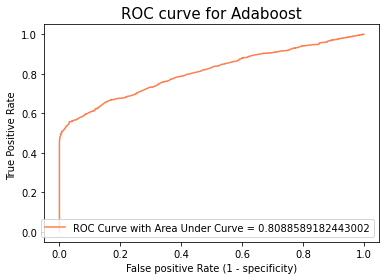

In [77]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Adaboost',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [78]:
Performance_with_over_sampled_data['Adaboosting']=[accuracy_score(y_test,ad_pred),
                                                                    precision_score(y_test,ad_pred),
                                                                    recall_score(y_test,ad_pred),
                                                                    f1_score(y_test,ad_pred),
                                                                    auc(fpr, tpr)]

# Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier()

In [80]:
gb_model.fit(x_train,y_train)
print('Training Accuracy : ',gb_model.score(x_train,y_train))

Training Accuracy :  0.7870700372979693


In [81]:
gb_pred=gb_model.predict(x_test)
print('Testing Accuracy : ',gb_model.score(x_test,y_test))

Testing Accuracy :  0.76731852833941


In [82]:
confusion_matrix(y_test,gb_pred)

array([[1397,  115],
       [ 587,  918]], dtype=int64)

In [83]:
print(classification_report(y_test,gb_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,gb_pred))
print('Precission : ',precision_score(y_test,gb_pred))
print('Recall : ',recall_score(y_test,gb_pred))
print('f1-score : ',f1_score(y_test,gb_pred))
print('Roc Auc score : ',roc_auc_score(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.80      1512
           1       0.89      0.61      0.72      1505

    accuracy                           0.77      3017
   macro avg       0.80      0.77      0.76      3017
weighted avg       0.80      0.77      0.76      3017


Accuracy is :  0.76731852833941
Precission :  0.888673765730881
Recall :  0.6099667774086379
f1-score :  0.7234042553191489
Roc Auc score :  0.7669542881752185


In [84]:
y_preds = gb_model.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.8211644606162879


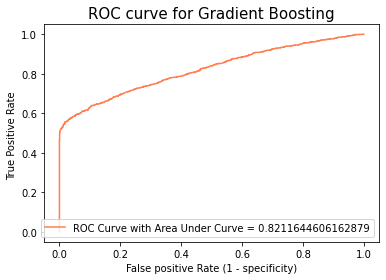

In [85]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Gradient Boosting',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [86]:
Performance_with_over_sampled_data['Gradient Boosting']=[accuracy_score(y_test,gb_pred),
                                                                    precision_score(y_test,gb_pred),
                                                                    recall_score(y_test,gb_pred),
                                                                    f1_score(y_test,gb_pred),
                                                                    auc(fpr, tpr)]

# Comparing performance

In [87]:
Performance_with_over_sampled_data

,Logistic Regression,SVM,Decision Tree,Random Forest,KNN,Adaboosting,Gradient Boosting
Accuracy,0.698376,0.743122,0.738150,0.760689,0.698044,0.749088,0.767319
Precision,0.716995,0.830018,0.739772,0.805621,0.703984,0.840619,0.888674
Recall,0.653156,0.609967,0.732890,0.685714,0.681063,0.613289,0.609967
F1_score,0.683588,0.703179,0.736315,0.740847,0.692334,0.709182,0.723404
AUC,0.759152,0.806765,0.737962,0.826558,0.765924,0.808859,0.821164


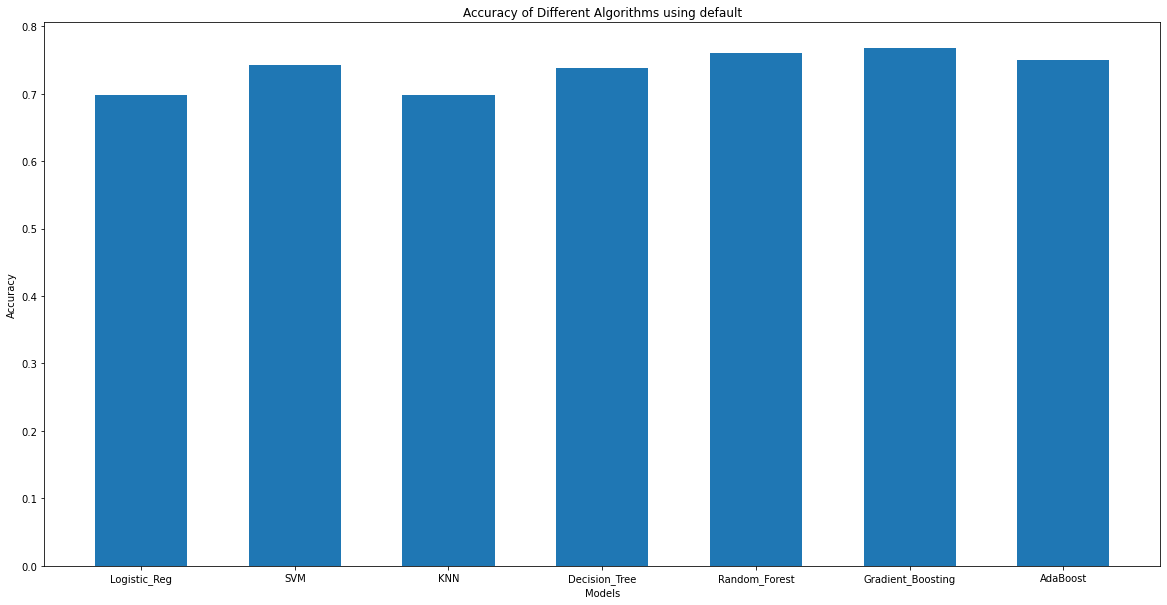

In [89]:
x = np.array(["Logistic_Reg","SVM", "KNN", "Decision_Tree", "Random_Forest", "Gradient_Boosting", "AdaBoost"])
y = np.array([0.698376,0.743122,0.698044,0.738150,0.760689,0.767319,0.749088])
width = 0.6
plt.figure(figsize=[20,10])
plt.bar(x,y,width)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms using default')
plt.show()

## Observation 
here we observe that the Gradient_Boosting Model having good accuracy

# Feature Selection using RFE, Feature Transformation

In [90]:
from sklearn.feature_selection import RFE

In [91]:
performance_metrics_with_selected_features=pd.DataFrame(index=['Accuracy','Precision','Recall','F1_score','AUC'])

# Logistic Regression

In [92]:
selector=RFE(estimator=LogisticRegression(max_iter=10000,solver='saga',penalty='l2',C=0.8383838383838385))
selector=selector.fit(predicts,response)
selected_features=predicts.columns[np.where(selector.get_support()==True)]
x_train,x_test,y_train,y_test=train_test_split(predicts[selected_features],response,test_size=0.2)

In [92]:
LR_final_model=LogisticRegression(max_iter=10000,solver='saga',penalty='l2',C=0.8383838383838385)
LR_final_model.fit(x_train,y_train)
lg_pred=LR_final_model.predict(x_test)
y_preds=LR_final_model.predict_proba(x_test)[:,1]


confusion_matrix(y_test,lg_pred)

array([[261, 252],
       [184, 287]], dtype=int64)

In [93]:
print(classification_report(y_test,lg_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,lg_pred))
print('Precission : ',precision_score(y_test,lg_pred))
print('Recall : ',recall_score(y_test,lg_pred))
print('f1-score : ',f1_score(y_test,lg_pred))
print('Roc Auc score : ',roc_auc_score(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.59      0.51      0.54       513
           1       0.53      0.61      0.57       471

    accuracy                           0.56       984
   macro avg       0.56      0.56      0.56       984
weighted avg       0.56      0.56      0.56       984


Accuracy is :  0.556910569105691
Precission :  0.5324675324675324
Recall :  0.6093418259023354
f1-score :  0.5683168316831683
Roc Auc score :  0.5590568778634485


In [94]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5865832309010319


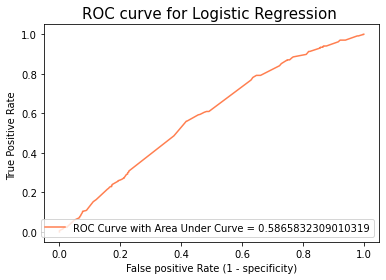

In [95]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Logistic Regression ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [143]:
performance_metrics_with_selected_features['Logistic Regression']=[accuracy_score(y_test,lg_pred),
                                                                    precision_score(y_test,lg_pred),
                                                                    recall_score(y_test,lg_pred),
                                                                    f1_score(y_test,lg_pred),
                                                                    auc(fpr, tpr)]

# SVM

In [97]:
selector=RFE(estimator=SVC(probability=True,kernel='linear',gamma='auto',C=0.9090909090909092),importance_getter='coef_')
selector=selector.fit(predicts,response)
selected_features=predicts.columns[np.where(selector.get_support()==True)]
x_train,x_test,y_train,y_test=train_test_split(predicts[selected_features],response,test_size=0.2)

In [98]:
svm_final_model=SVC(probability=True,kernel='linear',gamma='auto',C=0.9090909090909092)
svm_final_model.fit(x_train,y_train)
sv_pred=svm_final_model.predict(x_test)
y_preds=svm_final_model.predict_proba(x_test)[:,1]

In [99]:
confusion_matrix(y_test,sv_pred)

array([[110, 379],
       [ 59, 436]], dtype=int64)

In [100]:
print(classification_report(y_test,sv_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,sv_pred))
print('Precission : ',precision_score(y_test,sv_pred))
print('Recall : ',recall_score(y_test,sv_pred))
print('f1-score : ',f1_score(y_test,sv_pred))
print('Roc Auc score : ',roc_auc_score(y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.65      0.22      0.33       489
           1       0.53      0.88      0.67       495

    accuracy                           0.55       984
   macro avg       0.59      0.55      0.50       984
weighted avg       0.59      0.55      0.50       984


Accuracy is :  0.5548780487804879
Precission :  0.5349693251533743
Recall :  0.8808080808080808
f1-score :  0.6656488549618321
Roc Auc score :  0.5528784780318522


In [101]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5815888950858276


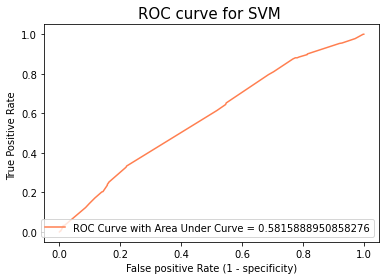

In [102]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for SVM ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [144]:
performance_metrics_with_selected_features['SVM']=[accuracy_score(y_test,sv_pred),
                                                                    precision_score(y_test,sv_pred),
                                                                    recall_score(y_test,sv_pred),
                                                                    f1_score(y_test,sv_pred),
                                                                    auc(fpr, tpr)]

# KNN

In [105]:
knn_final_model=KNeighborsClassifier(weights='distance',n_neighbors=9,metric='euclidean')
knn_final_model.fit(x_train,y_train)
kn_pred=knn_final_model.predict(x_test)
y_preds=knn_final_model.predict_proba(x_test)[:,1]

In [106]:
confusion_matrix(y_test,kn_pred)

array([[350, 139],
       [310, 185]], dtype=int64)

In [107]:
print(classification_report(y_test,kn_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,kn_pred))
print('Precission : ',precision_score(y_test,kn_pred))
print('Recall : ',recall_score(y_test,kn_pred))
print('f1-score : ',f1_score(y_test,kn_pred))
print('Roc Auc score : ',roc_auc_score(y_test,kn_pred))

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       489
           1       0.57      0.37      0.45       495

    accuracy                           0.54       984
   macro avg       0.55      0.54      0.53       984
weighted avg       0.55      0.54      0.53       984


Accuracy is :  0.5436991869918699
Precission :  0.5709876543209876
Recall :  0.37373737373737376
f1-score :  0.4517704517704517
Roc Auc score :  0.5447418975026337


In [108]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5386936853194522


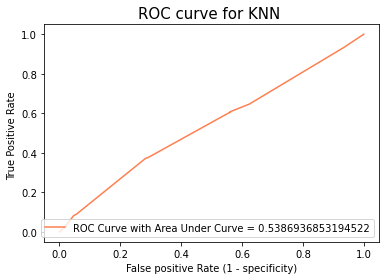

In [109]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for KNN ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [145]:
performance_metrics_with_selected_features['KNN']=[accuracy_score(y_test,kn_pred),
                                                                    precision_score(y_test,kn_pred),
                                                                    recall_score(y_test,kn_pred),
                                                                    f1_score(y_test,kn_pred),
                                                                    auc(fpr, tpr)]

# Decision Tree

In [112]:
selector=RFE(estimator=DecisionTreeClassifier(splitter= 'random',
                                     min_samples_split= 20,
                                     max_leaf_nodes=30,
                                     max_features= 'sqrt',
                                     max_depth=15,
                                     criterion= 'entropy'))
selector=selector.fit(predicts,response)
selected_features=predicts.columns[np.where(selector.get_support()==True)]
x_train,x_test,y_train,y_test=train_test_split(predicts[selected_features],response,test_size=0.2)

In [113]:
dt_final_model=DecisionTreeClassifier(splitter= 'random',
                                     min_samples_split= 20,
                                     max_leaf_nodes=30,
                                     max_features= 'sqrt',
                                     max_depth=15,
                                     criterion= 'entropy')
dt_final_model.fit(x_train,y_train)
dt_pred=dt_final_model.predict(x_test)
y_preds=dt_final_model.predict_proba(x_test)[:,1]

In [114]:
confusion_matrix(y_test,dt_pred)

array([[398,  94],
       [335, 157]], dtype=int64)

In [115]:
print(classification_report(y_test,dt_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,dt_pred))
print('Precission : ',precision_score(y_test,dt_pred))
print('Recall : ',recall_score(y_test,dt_pred))
print('f1-score : ',f1_score(y_test,dt_pred))
print('Roc Auc score : ',roc_auc_score(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.54      0.81      0.65       492
           1       0.63      0.32      0.42       492

    accuracy                           0.56       984
   macro avg       0.58      0.56      0.54       984
weighted avg       0.58      0.56      0.54       984


Accuracy is :  0.5640243902439024
Precission :  0.6254980079681275
Recall :  0.31910569105691056
f1-score :  0.4226110363391655
Roc Auc score :  0.5640243902439024


In [116]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.584950674201864


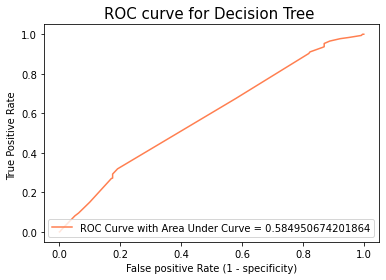

In [117]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Decision Tree ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [146]:
performance_metrics_with_selected_features['Decision Tree']=[accuracy_score(y_test,dt_pred),
                                                                    precision_score(y_test,dt_pred),
                                                                    recall_score(y_test,dt_pred),
                                                                    f1_score(y_test,dt_pred),
                                                                    auc(fpr, tpr)]

# Random Forest

In [119]:
selector=RFE(estimator=RandomForestClassifier(n_estimators= 20,
                                     min_samples_split=5,
                                     max_leaf_nodes=80,
                                     max_features= 'auto',
                                     max_depth=20,
                                     criterion= 'gini'))
selector=selector.fit(predicts,response)
selected_features=predicts.columns[np.where(selector.get_support()==True)]
x_train,x_test,y_train,y_test=train_test_split(predicts[selected_features],response,test_size=0.2)

In [120]:
rf_final_model=RandomForestClassifier(n_estimators= 20,
                                     min_samples_split=5,
                                     max_leaf_nodes=80,
                                     max_features= 'auto',
                                     max_depth=20,
                                     criterion= 'gini')
rf_final_model.fit(x_train,y_train)
rf_pred=rf_final_model.predict(x_test)
y_preds=rf_final_model.predict_proba(x_test)[:,1]

In [121]:
confusion_matrix(y_test,rf_pred)

array([[243, 261],
       [174, 306]], dtype=int64)

In [122]:
print(classification_report(y_test,rf_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,rf_pred))
print('Precission : ',precision_score(y_test,rf_pred))
print('Recall : ',recall_score(y_test,rf_pred))
print('f1-score : ',f1_score(y_test,rf_pred))
print('Roc Auc score : ',roc_auc_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.58      0.48      0.53       504
           1       0.54      0.64      0.58       480

    accuracy                           0.56       984
   macro avg       0.56      0.56      0.56       984
weighted avg       0.56      0.56      0.56       984


Accuracy is :  0.5579268292682927
Precission :  0.5396825396825397
Recall :  0.6375
f1-score :  0.5845272206303723
Roc Auc score :  0.5598214285714286


In [123]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.576037533068783


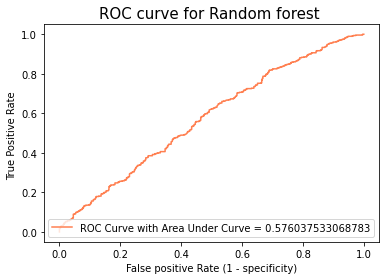

In [124]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Random forest ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [147]:
performance_metrics_with_selected_features['Random Forest']=[accuracy_score(y_test,rf_pred),
                                                                    precision_score(y_test,rf_pred),
                                                                    recall_score(y_test,rf_pred),
                                                                    f1_score(y_test,rf_pred),
                                                                    auc(fpr, tpr)]

# Gradient Boosting

In [126]:
selector=RFE(estimator=GradientBoostingClassifier(n_estimators= 50,
                                             min_samples_split= 10,
                                             max_leaf_nodes= 10,
                                             max_features= 'auto',
                                             max_depth= 20,
                                             criterion= 'mse'))
selector=selector.fit(predicts,response)
selected_features=predicts.columns[np.where(selector.get_support()==True)]
x_train,x_test,y_train,y_test=train_test_split(predicts[selected_features],response,test_size=0.2)

In [127]:
gd_final_model=GradientBoostingClassifier(n_estimators= 50,
                                             min_samples_split= 10,
                                             max_leaf_nodes= 10,
                                             max_features= 'auto',
                                             max_depth= 20,
                                             criterion= 'mse')
gd_final_model.fit(x_train,y_train)
gb_pred=gd_final_model.predict(x_test)
y_preds=gd_final_model.predict_proba(x_test)[:,1]

In [128]:
confusion_matrix(y_test,gb_pred)

array([[241, 222],
       [197, 324]], dtype=int64)

In [129]:
print(classification_report(y_test,gb_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,gb_pred))
print('Precission : ',precision_score(y_test,gb_pred))
print('Recall : ',recall_score(y_test,gb_pred))
print('f1-score : ',f1_score(y_test,gb_pred))
print('Roc Auc score : ',roc_auc_score(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.55      0.52      0.53       463
           1       0.59      0.62      0.61       521

    accuracy                           0.57       984
   macro avg       0.57      0.57      0.57       984
weighted avg       0.57      0.57      0.57       984


Accuracy is :  0.5741869918699187
Precission :  0.5934065934065934
Recall :  0.6218809980806143
f1-score :  0.6073102155576383
Roc Auc score :  0.5711996783059659


In [130]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5930508284865041


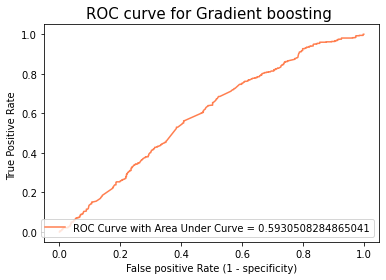

In [131]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Gradient boosting ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [148]:
performance_metrics_with_selected_features['Gradient boosting']=[accuracy_score(y_test,gb_pred),
                                                                    precision_score(y_test,gb_pred),
                                                                    recall_score(y_test,gb_pred),
                                                                    f1_score(y_test,gb_pred),
                                                                    auc(fpr, tpr)]

# Adaboost

In [133]:
selector=RFE(estimator=AdaBoostClassifier(n_estimators= 50, learning_rate= 0.5, algorithm= 'SAMME.R'))
selector=selector.fit(predicts,response)
selected_features=predicts.columns[np.where(selector.get_support()==True)]
x_train,x_test,y_train,y_test=train_test_split(predicts[selected_features],response,test_size=0.2)

In [134]:
ada_final_model=AdaBoostClassifier(n_estimators= 50, learning_rate= 0.5, algorithm= 'SAMME.R')
ada_final_model.fit(x_train,y_train)
ad_pred=ada_final_model.predict(x_test)
y_preds=ada_final_model.predict_proba(x_test)[:,1]

In [135]:
confusion_matrix(y_test,ad_pred)

array([[193, 299],
       [145, 347]], dtype=int64)

In [136]:
print(classification_report(y_test,ad_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,ad_pred))
print('Precission : ',precision_score(y_test,ad_pred))
print('Recall : ',recall_score(y_test,ad_pred))
print('f1-score : ',f1_score(y_test,ad_pred))
print('Roc Auc score : ',roc_auc_score(y_test,ad_pred))

              precision    recall  f1-score   support

           0       0.57      0.39      0.47       492
           1       0.54      0.71      0.61       492

    accuracy                           0.55       984
   macro avg       0.55      0.55      0.54       984
weighted avg       0.55      0.55      0.54       984


Accuracy is :  0.5487804878048781
Precission :  0.5371517027863777
Recall :  0.7052845528455285
f1-score :  0.6098418277680141
Roc Auc score :  0.5487804878048781


In [137]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5599304316213893


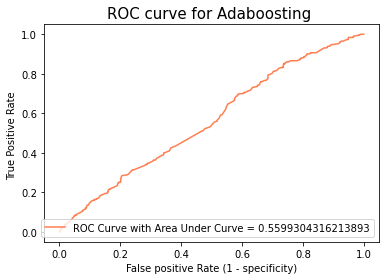

In [138]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Adaboosting ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [149]:
performance_metrics_with_selected_features['Adaboost']=[accuracy_score(y_test,ad_pred),
                                                                    precision_score(y_test,ad_pred),
                                                                    recall_score(y_test,ad_pred),
                                                                    f1_score(y_test,ad_pred),
                                                                    auc(fpr, tpr)]

In [152]:
performance_metrics_with_default_parameters

,Logistic Regression,SVM,Decision Tree,Random Forest,KNN,Adaboosting,Gradient Boosting
Accuracy,0.566057,0.565041,0.511179,0.553862,0.531504,0.572154,0.572154
Precision,0.564374,0.565693,0.520343,0.559921,0.540541,0.573284,0.575816
Recall,0.640000,0.620000,0.486000,0.570000,0.520000,0.618000,0.600000
F1_score,0.599813,0.591603,0.502585,0.564916,0.530071,0.594803,0.587659
AUC,0.588322,0.589479,0.511595,0.555822,0.532882,0.596667,0.609669


In [150]:
performance_metrics_with_selected_features

,Logistic Regression,SVM,KNN,Decision Tree,Random Forest,Gradient boosting,Adaboost
Accuracy,0.488821,0.503049,0.516260,0.494919,0.511179,0.512195,0.548780
Precision,0.489796,0.501840,0.524691,0.490040,0.509700,0.510989,0.537152
Recall,0.536585,0.831301,0.345528,0.250000,0.587398,0.567073,0.705285
F1_score,0.512124,0.625861,0.416667,0.331090,0.545798,0.537572,0.609842
AUC,0.559930,0.559930,0.559930,0.559930,0.559930,0.559930,0.559930


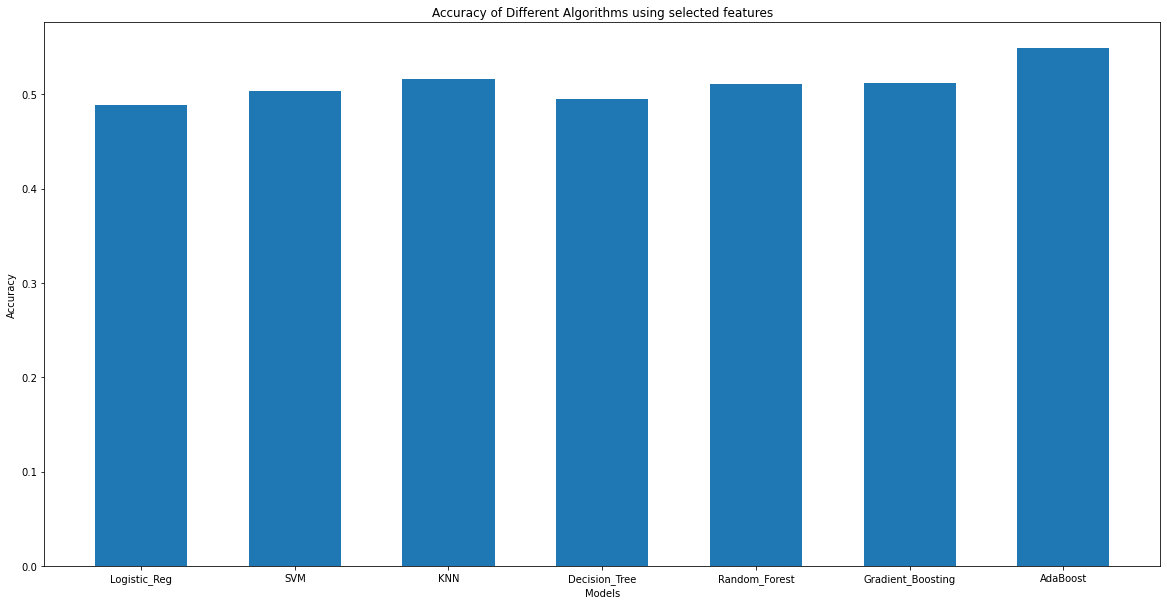

In [160]:
x = np.array(["Logistic_Reg","SVM", "KNN", "Decision_Tree", "Random_Forest", "Gradient_Boosting", "AdaBoost"])
y = np.array([0.488821,0.503049,0.516260,0.494919,0.511179,0.512195,0.548780])
width = 0.6
plt.figure(figsize=[20,10])
plt.bar(x,y,width)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms using selected features')
plt.show()

# Some conclusion 
here we compare default and selected parameter model to each other,we observe that deafault parameters having good accuracy
<br>Here we conclude that all the models having good accuracy.
<br>Reco_Policy_Cat, Holding_Policy_Type are most imported features.
<br>If Holding_Policy_Type is of type 1 or 3, then they have more chances of cross selling insurance.
<br>If Holding policy duration in in bet 1, 2, 4 or more than 14 years then we have more chance to cross sell.